# Classification Assigment

In [1]:
# dataset upload
import pandas as pd 

ds = pd.read_csv("model.csv", index_col=0)
ds1 = pd.read_csv("model.csv") #to check for duplicated indexes
ds

,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
id,,,,,,,,,,,,
1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1


## Data pre-processing: DATA PREPARATION (validation, transformation, reduction) AND ESPLORATION (univ, bivar, multivar)

### -- DATA VALIDATION --

In [2]:
# duplicated data

ds1["id"].unique() #no duplicates!

array([     1,      2,      3, ..., 102349, 102350, 102351], dtype=int64)

In [3]:
# missing data

nan = ds.isna()
nan.sum(axis = 0, skipna = True) #5091 missing data from License_Type corresponding to Driving_License = 0

Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [4]:
#substituting missing datas in the Licence_Type column with zeroes

ds_notna = ds.fillna(0)

In [5]:
nan = ds_notna.isna()
nan.sum(axis = 0, skipna = True)

Gender                  0
Age                     0
Driving_License         0
Licence_Type            0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Seniority               0
Target                  0
dtype: int64

# Categorical variables

In [6]:
#check the variables type

ds_notna.dtypes

Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [7]:
#Driving_License, Region_Code and Policy_Sales_Channel are actually categorical variables, 
#so we have to convert them in object-type variables

ds_notna['Driving_License'] = ds_notna['Driving_License'].astype('object')
ds_notna['Region_Code'] = ds_notna['Region_Code'].astype('object')
ds_notna['Policy_Sales_Channel'] = ds_notna['Policy_Sales_Channel'].astype('object')

#Target is also a categorical variable, but we keep it with the numerical for now (useful for the pairplot)

In [8]:
ds_notna.dtypes

Gender                  object
Age                      int64
Driving_License         object
Licence_Type            object
Region_Code             object
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel    object
Seniority                int64
Target                   int64
dtype: object

In [9]:
#split categorical variables from the dataset

ds_cat = ds_notna.select_dtypes(include=['object']) #categorical
ds_cat

,Gender,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel
id,,,,,,,,
1,Female,1,M,30,No,1-2 Year,Yes,154
2,Male,1,M,3,Yes,< 1 Year,No,152
3,Male,1,C,28,No,1-2 Year,Yes,52
4,Male,1,B,28,Yes,1-2 Year,No,26
5,Female,1,B,46,No,1-2 Year,Yes,124
...,...,...,...,...,...,...,...,...
102347,Female,1,B,32,Yes,< 1 Year,No,152
102348,Female,1,M,28,No,1-2 Year,Yes,26
102349,Male,1,M,8,No,> 2 Years,Yes,124


In [10]:
ds_cat.columns

Index(['Gender', 'Driving_License', 'Licence_Type', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage',
       'Policy_Sales_Channel'],
      dtype='object')

In [11]:
#Converting categorical variables into boolean

dummies1 = pd.get_dummies(ds_cat[['Region_Code', 'Vehicle_Age', 'Policy_Sales_Channel']],drop_first=False)
dummies2 = pd.get_dummies(ds_cat[['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Licence_Type']],drop_first=True)
dummies = pd.concat([dummies1, dummies2], axis=1)

dummies

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Policy_Sales_Channel_163,Gender_Male,Driving_License_1,Previously_Insured_Yes,Vehicle_Damage_Yes,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102347,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
102348,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
102349,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,0,1


# Numerical Variables

In [12]:
ds_num = ds_notna.select_dtypes(include=['int64']) #numerical
ds_num

,Age,Annual_Premium,Seniority,Target
id,,,,
1,44,25741,152,0
2,23,2630,256,0
3,43,70720,224,0
4,60,48512,86,0
5,42,32169,132,0
...,...,...,...,...
102347,25,34695,133,0
102348,47,30564,114,1
102349,72,52844,92,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014DF8623BC8>,
      dtype=object)

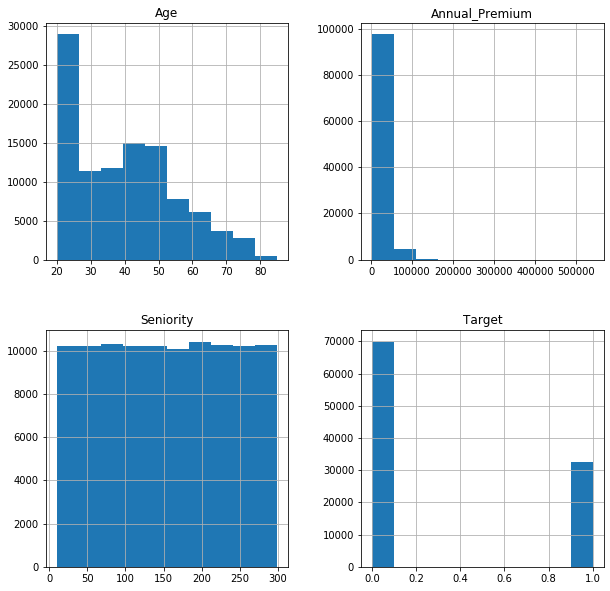

In [13]:
# operating with numerical variables

ds_num.hist(figsize=(10,10))

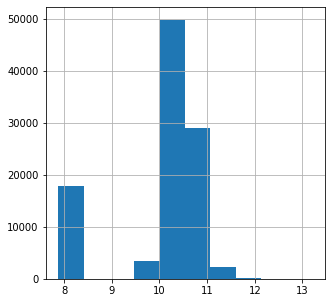

In [14]:
#log on Annual_Premium

import math
pd.options.mode.chained_assignment = None

ds_num['logPremium']=ds_num['Annual_Premium'].apply(math.log)

ds_num['logPremium'].hist(figsize=(5,5))

In [15]:
#pairplot
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
ds_num.columns

Index(['Age', 'Annual_Premium', 'Seniority', 'Target', 'logPremium'], dtype='object')

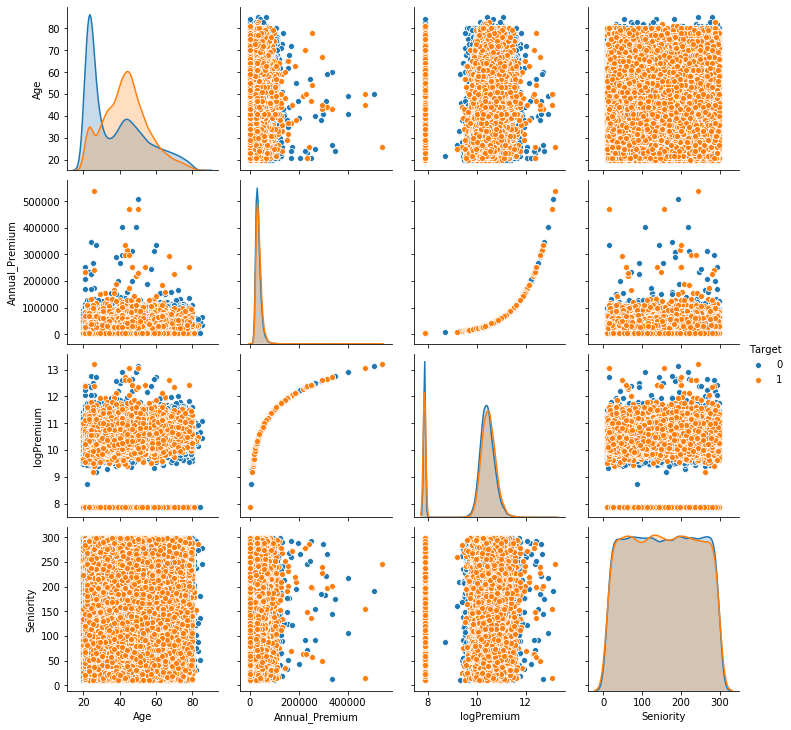

In [17]:
sns.pairplot(ds_num[['Age', 'Annual_Premium', 'logPremium', 'Seniority', 'Target',
       ]], hue='Target')

In [18]:
#now we can remove the Target column from ds_num (since it's actually a categorical variable) and keep it for the calssification
ds_target = ds_num.iloc[:,-2]
ds_target

id
1         0
2         0
3         0
4         0
5         0
         ..
102347    0
102348    1
102349    1
102350    0
102351    0
Name: Target, Length: 102351, dtype: int64

In [19]:
ds_num2 = ds_num.drop(['Target'], axis=1)
ds_num2

,Age,Annual_Premium,Seniority,logPremium
id,,,,
1,44,25741,152,10.155840
2,23,2630,256,7.874739
3,43,70720,224,11.166484
4,60,48512,86,10.789566
5,42,32169,132,10.378759
...,...,...,...,...
102347,25,34695,133,10.454351
102348,47,30564,114,10.327578
102349,72,52844,92,10.875099


# Outliers

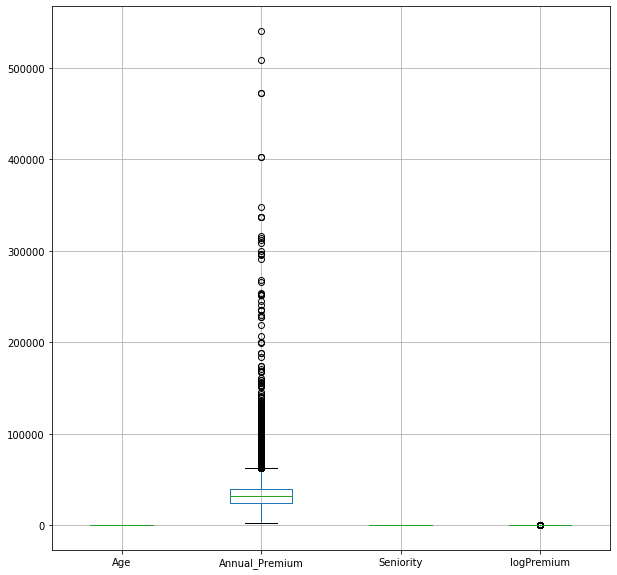

In [20]:
ds_num2.boxplot(figsize=(10,10)) #boxplot for all the numerical variables

count    100286.000000
mean      29671.586353
std       15190.289901
min        2630.000000
25%       24218.250000
50%       31659.000000
75%       39151.750000
max       65835.000000
Name: Annual_Premium, dtype: float64

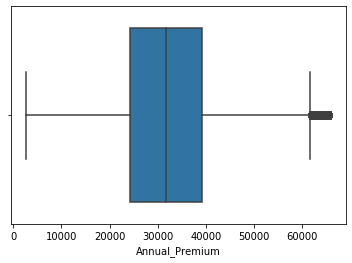

In [21]:
# noisy data (outliers) -> has sense doing that only for: Age; Region_Code; Annual_Premium; Policy_Sales_Channel; Seniority
import numpy as np

%matplotlib inline
import seaborn as sns

#sns.boxplot(x = ds['Age']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Region_Code']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Annual_Premium'])
#sns.boxplot(x = ds['Policy_Sales_Channel']) # Do not have outilers. all data keeped.
#sns.boxplot(x = ds['Seniority']) # Do not have outilers. all data keeped.

#ds["Annual_Premium"].describe()

#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = ds_num2["Annual_Premium"].mean()
sd = ds_num2["Annual_Premium"].std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
x = 2 # with 2 -> eliminate 2%, with 1 -> eliminate 28%
Annual_Premium = ds_num2["Annual_Premium"]
Annual_Premium_noOutlier = Annual_Premium[ np.abs(Annual_Premium - mean) <= x * sd ]

#sns.boxplot(x = ds['Annual_Premium'])
sns.boxplot(x = Annual_Premium_noOutlier)

#ds["Annual_Premium"].describe()
Annual_Premium_noOutlier.describe()

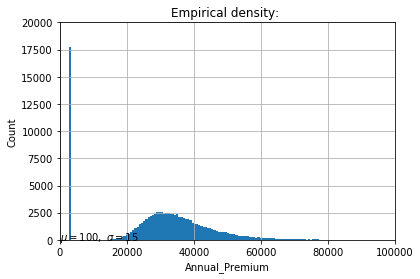

In [22]:
ds_num.hist(column="Annual_Premium",bins='auto')

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 20000)
plt.grid(True)
plt.show()

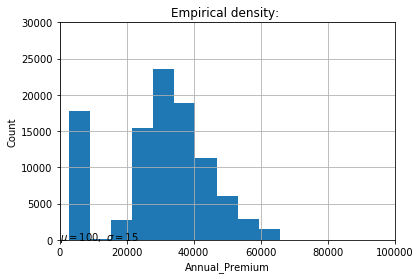

In [23]:
Annual_Premium_noOutlier.hist()

plt.xlabel('Annual_Premium')
plt.ylabel('Count')
plt.title('Empirical density: ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 100000) #100000
plt.ylim(0, 30000)
plt.grid(True)
plt.show()

In [64]:
# eliminate outliers data from ds
Annual_Premium_noOutlier1 = np.array(Annual_Premium_noOutlier.index)
ds_index = np.array(ds_num2.index)
Annual_Premium_Outlier = np.delete(ds_index, Annual_Premium_noOutlier1)

ds_num_noOL = ds_num2.drop(Annual_Premium_Outlier)


ds_num_noOL

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  after removing the cwd from sys.path.


,Age,Annual_Premium,Seniority,logPremium
id,,,,
2,23,2630,256,7.874739
3,43,70720,224,11.166484
5,42,32169,132,10.378759
6,40,34092,285,10.436818
7,26,22452,59,10.019135
...,...,...,...,...
102347,25,34695,133,10.454351
102348,47,30564,114,10.327578
102349,72,52844,92,10.875099


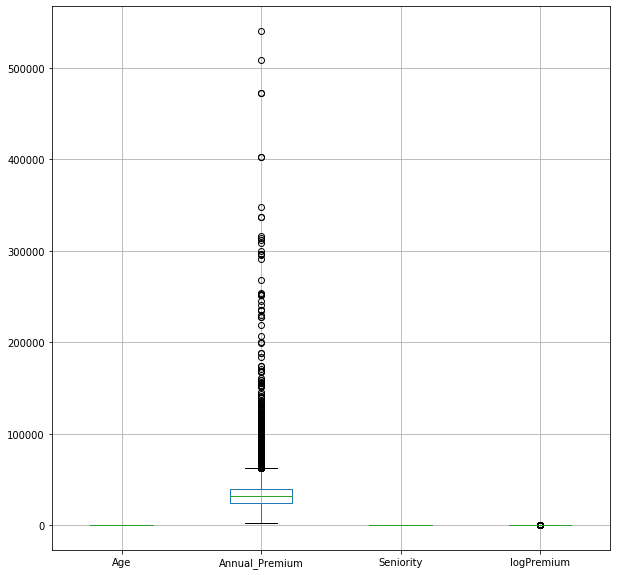

In [25]:
ds_num_noOL.boxplot(figsize=(10,10))

### -- DATA TRANSFORMATION --

# Standardization

In [26]:
#z-score
from sklearn.preprocessing import StandardScaler

zscaler = StandardScaler().fit(ds_num_noOL)
ds_zscaled = pd.DataFrame(zscaler.transform(ds_num_noOL))
ds_zscaled.index = ds_num_noOL.index
ds_zscaled.columns = ds_num_noOL.columns
ds_zscaled = ds_zscaled.sort_index(ascending=True)

ds_zscaled

,Age,Annual_Premium,Seniority,logPremium
id,,,,
2,-1.128831,-1.604747,1.211622,-2.106680
3,0.210232,2.281798,0.829429,1.134886
5,0.143279,0.081325,-0.269374,0.359169
6,0.009373,0.191089,1.557984,0.416343
7,-0.927972,-0.473317,-1.141251,0.005027
...,...,...,...,...
102347,-0.994925,0.225508,-0.257431,0.433609
102348,0.478045,-0.010288,-0.484357,0.308769
102349,2.151874,1.261445,-0.747115,0.847944


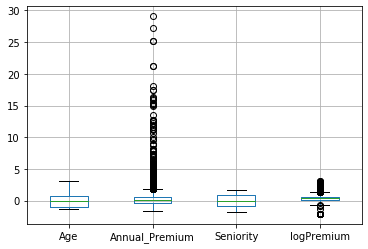

In [27]:
ds_zscaled.boxplot()

In [28]:
#minmax

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(copy=False,feature_range=(-1, 1)).fit(ds_num_noOL)
ds_mmscaled = pd.DataFrame(mmscaler.transform(ds_num_noOL))
ds_mmscaled.index = ds_num_noOL.index
ds_mmscaled.columns = ds_num_noOL.columns

#ds_mmscaled

In [29]:
#ds_mmscaled.boxplot()

In [30]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location,
# asimmetry of density curve, kurtosis

# ...code...

# check if normal probability fall in a straight line

# ...code...

In [31]:
# feature extraction (make num atribute 2,4,6,7; new atributes; ...)

# ...code...

# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

In [32]:
# merging on ds_cat and ds_num
ds_final1 = pd.merge(dummies, ds_zscaled, left_index=True, right_index=True)
ds_final = pd.merge(ds_final1, ds_target, left_index=True, right_index=True)
ds_final

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium,Target
id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,-1.128831,-1.604747,1.211622,-2.106680,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.210232,2.281798,0.829429,1.134886,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.143279,0.081325,-0.269374,0.359169,0
6,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0.009373,0.191089,1.557984,0.416343,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-0.927972,-0.473317,-1.141251,0.005027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102347,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,-0.994925,0.225508,-0.257431,0.433609,0
102348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.478045,-0.010288,-0.484357,0.308769,1
102349,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,2.151874,1.261445,-0.747115,0.847944,1


### -- DATA REDUCTION --

In [33]:
# reduce the number of feature/atributes 
# -> FEATURE SELECTION (filter [we can filter by correlation with target], wrapper)
# (!! no need in classification tree !! embedded)

# ...code...

# -> PCA

# ...code...

In [34]:
# reduce the number of value (discretization -> pg 123 in pdf)

# ...code...

In [35]:
# plotting of data (histograms for empirical density) + measure of central tendency, dispersion, relative location

# ...code...

# check if normal probability fall in a streight line

# ...code...

## Models

In [46]:
#separating train and test set

X = ds_final.iloc[:,0:-1] #explanatory variables
y = ds_final.iloc[:,-1] #target variables

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.10,
                                                    stratify=y,
                                                    random_state= 666)

print(X_train.shape, X_test.shape)

(90256, 211) (10029, 211)


In [47]:
train_set = pd.concat([X_train,y_train], axis=1)

Target
0    61646
1    28610
dtype: int64


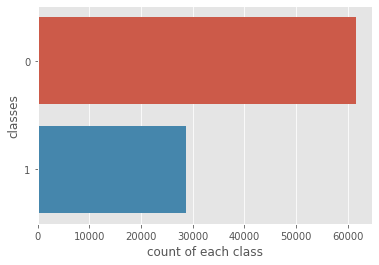

In [48]:
#distribution of targets in the train set

print(train_set.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=train_set.Target ,data=train_set) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [49]:
#downsampling the majority class on the train set

from sklearn.utils import resample

#1) Separate majority and minority classes
train_majority = train_set[train_set.Target==0]
train_minority = train_set[train_set.Target==1] 

train_majority_downsampled = resample(train_majority, 
                                   replace=False, 
                                   n_samples=28610,      #number of samples in minority class 
                                   random_state=120)
train_downsampled = pd.concat([X_majority_downsampled, X_minority])
train_downsampled.Target.value_counts()

1    28610
0    28610
Name: Target, dtype: int64

Target
0    28610
1    28610
dtype: int64


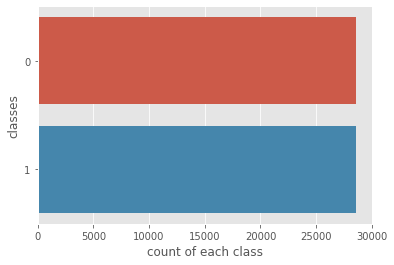

In [50]:
print(train_downsampled.groupby('Target').size()) 

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=train_downsampled.Target ,data=train_downsampled) 
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [51]:
train_downsampled.head()

,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Region_Code_4,Region_Code_5,Region_Code_6,Region_Code_7,Region_Code_8,Region_Code_9,...,Licence_Type_A,Licence_Type_B,Licence_Type_C,Licence_Type_D,Licence_Type_M,Age,Annual_Premium,Seniority,logPremium,Target
id,,,,,,,,,,,,,,,,,,,,,
52982,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.076326,-0.303733,-0.305205,0.127408,0
32797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.879764,-0.555397,-1.404008,-0.060154,0
29119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,-1.195784,0.355021,-0.759058,0.495992,0
31427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1.329691,-1.604747,-0.950154,-2.106680,0
34928,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-1.195784,0.074019,-0.030504,0.355243,0


In [52]:
X_train_downsampled = train_downsampled.iloc[:,0:-1]
y_train_downsampled = train_downsampled.iloc[:,-1]

In [59]:
#importing the quality metrics functions

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score

In [60]:
#funzione di ricerca dei parametri migliori

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train_downsampled, y_train_downsampled)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [61]:
#funzione curva roc

def roc(classifier,X_train_downsampled,y_train_downsampled,X_test,y_test):
    classifier.fit(X_train_downsampled, y_train_downsampled)
    y_pred = classifier.predict(X_test)

    y_probs = classifier.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## KNN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,1000,10)}

hyperp_search(classifier,parameters)

f1_train: 0.807759 using {'n_neighbors': 41}
Mean 0.713562 Std (0.004131) with: {'n_neighbors': 1}
Mean 0.796234 Std (0.002203) with: {'n_neighbors': 11}
Mean 0.805268 Std (0.001767) with: {'n_neighbors': 21}
Mean 0.807447 Std (0.001488) with: {'n_neighbors': 31}
Mean 0.807759 Std (0.000636) with: {'n_neighbors': 41}
Mean 0.807597 Std (0.000566) with: {'n_neighbors': 51}
Mean 0.807464 Std (0.000886) with: {'n_neighbors': 61}
Mean 0.807667 Std (0.001030) with: {'n_neighbors': 71}
Mean 0.807588 Std (0.000933) with: {'n_neighbors': 81}
Mean 0.807302 Std (0.001347) with: {'n_neighbors': 91}
Mean 0.806543 Std (0.000951) with: {'n_neighbors': 101}
Mean 0.806210 Std (0.001010) with: {'n_neighbors': 111}
Mean 0.806096 Std (0.001228) with: {'n_neighbors': 121}
Mean 0.805951 Std (0.001138) with: {'n_neighbors': 131}
Mean 0.805765 Std (0.001438) with: {'n_neighbors': 141}
Mean 0.804909 Std (0.001299) with: {'n_neighbors': 151}
Mean 0.804667 Std (0.001675) with: {'n_neighbors': 161}
Mean 0.804397 

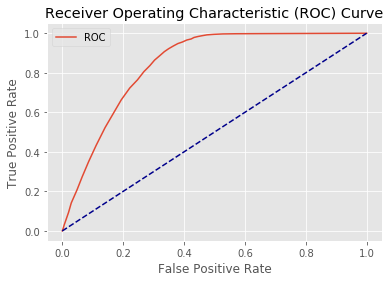

AUC: 0.84


In [63]:
classifier = KNeighborsClassifier(n_neighbors=41)
fprknn,tprknn=roc(classifier,X_train,y_train,X_test,y_test)

## SVM

In [ ]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear', 'poly', 'rbf', 'sigmoid'], "C":np.arange(1,100,10)}

hyperp_search(classifier,parameters)

In [ ]:
classifier=SVC(C=, kernel='', probability=True)
fprsvm,tprsvm=roc(classifier,X_train,y_train,X_test,y_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [,,],
              'min_samples_split': [],
              'min_samples_leaf': []}

hyperp_search(classifier,parameters)

In [ ]:
model_tree = DecisionTreeClassifier(criterion='', max_depth=, min_samples_leaf=, min_samples_split=)

fprt,tprt=roc(classifier,X_train,y_train,X_test,y_test)

## Logistic Regression

## Naive Bayes

## Multi-Layer Perceptron